In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [36]:
class Percolation:
    '''
    A class to simulate the directed percolation process from the top to the bottom of a 2D n * n grid. Each site of the grid
    has a certain probablility to be blocked. During the process, water first fills the open sites and then flow downwards
    row by row. An open site can be reached only when there is water in a open site at its top, left or right neighbor site.
    If there is any water can reach the bottom row of the grid, the percolation is successful.

    parameters:
    grid (np array): the initial grid; the allowed value is 0 (blocked) or 1 (open)
    grid_filled: the final grid with water filling all sites that can be reached; the value of water-filled site is 2
    n (int): the row and col size of the grid
    p (float): the probablity of an individual site to be blocked; take a value in the range [0, 1] (both included)
    random_state(int): the seed of numpy random number generator
  
    '''
    def __init__(self, n=100, p=0.5, grid=None, random_state=None) -> None:
        # generate a new grid if grid is None
        if grid == None:
            self.n = n
            self.p = p
            self._initialize_grid()
        else:
            assert np.all(grid < 2 and grid >= 0)
            self.grid = grid
            self.n = grid.shape[0]
            self.p = 1 - np.mean(grid)
        self.grid_filled = self.grid.copy()
    
    def _initialize_grid(self):
        ''' 
        generate an intitial grid using the given grid size and blocking probablity
        '''
        self.grid = np.random.choice(2, size=(self.n, self.n), p=[self.p, 1 - self.p])

    def _flow(self):
        '''
        simulate one percolation process with current grid(before filling any water); starting by filling the open sites
        of the first row

        return whether the bottom row can be reached; type bool - True if the bottom row is reached
        '''
        # traverse the first row, whenever finding an open site(neither blocked or filled)
        # max_depth records the max row index that has been reached by the water
        max_depth = 0 

        for col_idx in range(self.n):
            if self.grid_filled[0, col_idx] == 1: # practice a DFS to fill all sites that can be reached starting from this site
                max_depth = max(self._flow_DFS(0, col_idx), max_depth) # update max_depth after every DFS

        return max_depth == self.n - 1

    def _flow_DFS(self, x, y):
        ''' 
        fill all open sited reachable starting from a site (x, y);
        the algorithm is DFS and the implementation is recursion

        return the max row index (depth) that is reached at the end of search
        '''
        # the base case - no open neighbors - is handled natrually in the process of looking for open neighbors below

        max_depth = x
        # fill current site with water
        self.grid_filled[x, y] = 2
        # look for open neighbors
        open_neighbors = self._get_open_neighbors(x, y)
        # continue the DFS recursively at every neighbor
        # and update max_depth
        for neighbor in open_neighbors: # each neighbor is represented by a tuple (x_nei, y_nei)
            x_nei = neighbor[0]
            y_nei = neighbor[1]
            max_depth = max(max_depth, self._flow_DFS(x_nei, y_nei))

        return max_depth
        
    def _get_open_neighbors(self, x, y):
        # open_neighbors stores the row and col index of the open neighbors as tuples
        open_neighbors = []
        for move in [(0, 1), (0, -1), (1, 0)]:
                x_nei = x + move[0]
                y_nei = y + move[1]
                if x_nei >= 0 and x_nei < self.n and y_nei >= 0 and y_nei < self.n and self.grid_filled[x_nei, y_nei] == 1:
                    open_neighbors.append((x_nei, y_nei))
        return open_neighbors

    def percolation(self):
        '''
        reinitialize the grid and do a percolation

        return whether this perlocation is successful - type bool, True if successful 
        '''
        self._initialize_grid()
        self.grid_filled = self.grid.copy()
        return self._flow()

In [37]:
from matplotlib.colors import LinearSegmentedColormap
# code copied from Willam's doc
def plot_percolation(mat):
    """
    Plots a percolation matrix, where 0 indicates a blocked site, 1 indicates an empty 
    site, and 2 indicates a filled site
    """
    cvals  = [0, 1, 2]
    colors = [(0, 0, 0), (0.4, 0.4, 0.4), (0.372549, 0.596078, 1)]

    norm = plt.Normalize(min(cvals), max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = LinearSegmentedColormap.from_list("", tuples)
    plt.imshow(mat, cmap=cmap, vmin=0, vmax=2)

Complexity Analysis: <br />
The time comlexity is dominated by the DFS algorithm - every recursion node costs $O(1)$ and the upper bound of total number of recursion nodes is $O(N^2)$ => total TC = $O(N^2)$ <br />
The space complexity is dominated by the two grids, which is $O(N^2)$

initial_grid n=100 p=0.5


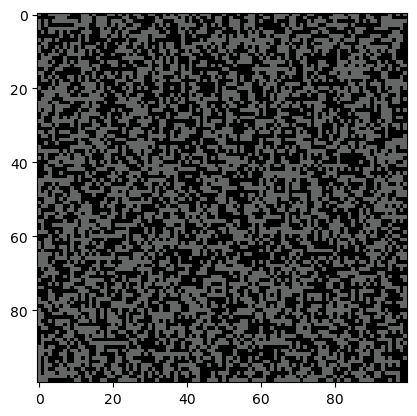

In [38]:
# test the model
# initialize the model
# with default arguments - n = 100, p = 0.5
model = Percolation()
print("initial_grid", "n=100", "p=0.5")
plt.figure()
plot_percolation(model.grid)

Initial grid n=120 p=0.6


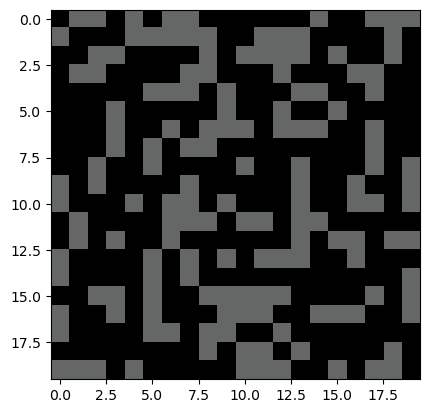

In [47]:
# with customized parameters - n = 120, p = 0.6
model = Percolation(n=20, p=0.6)
print("Initial grid", "n=120", "p=0.6")
plt.figure()
plot_percolation(model.grid)


simulate n=20 p=0.6
False


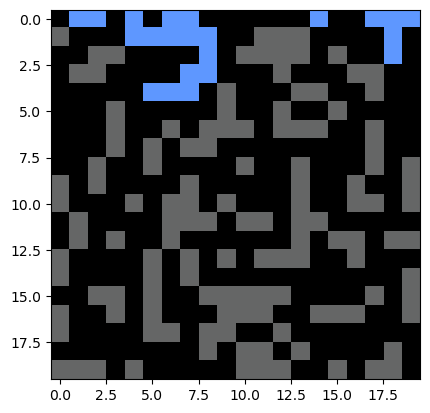

In [48]:
# simulate one percolation with the initial grid
print("simulate", "n=20", "p=0.6")
print(model._flow())
plt.figure()
plot_percolation(model.grid_filled)

simulate n=20 p=0.6
False


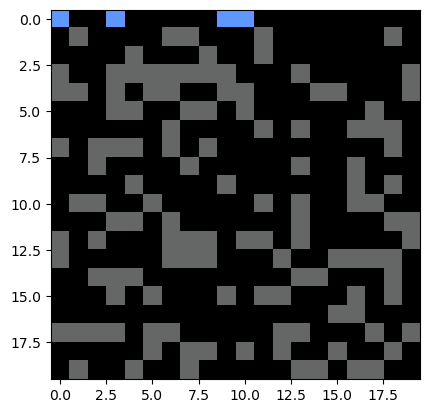

In [49]:
# reinitialize the grid and perform a simulation
print("simulate", "n=20", "p=0.6")
print(model.percolation())
plt.figure()
plot_percolation(model.grid_filled)

simulate n=20 p=0.1
True


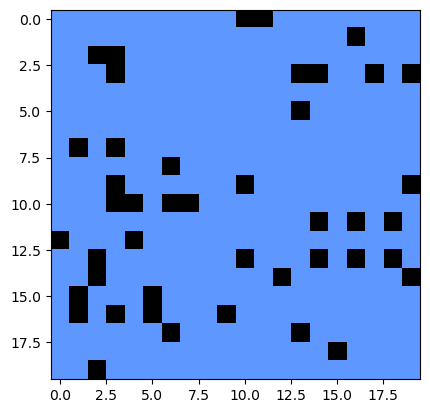

In [51]:
# Try different block probability - p = 0.1, 0.4, 0.9
model = Percolation(n=20, p=0.1)
print("simulate", "n=20", "p=0.1")
print(model.percolation())
plt.figure()
plot_percolation(model.grid_filled)

simulate n=20 p=0.4
False


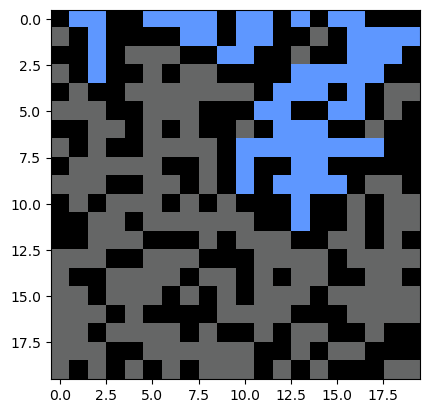

In [52]:
model = Percolation(n=20, p=0.4)
print("simulate", "n=20", "p=0.4")
print(model.percolation())
plt.figure()
plot_percolation(model.grid_filled)

simulate n=20 p=0.9
False


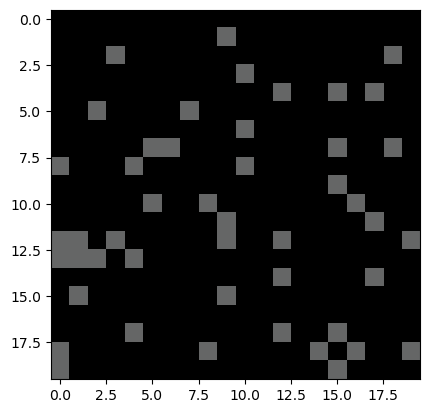

In [53]:
model = Percolation(n=20, p=0.9)
print("simulate", "n=20", "p=0.9")
print(model.percolation())
plt.figure()
plot_percolation(model.grid_filled)

Running replicate simulations for p = 0.0
Running replicate simulations for p = 0.041666666666666664
Running replicate simulations for p = 0.08333333333333333
Running replicate simulations for p = 0.125
Running replicate simulations for p = 0.16666666666666666
Running replicate simulations for p = 0.20833333333333331
Running replicate simulations for p = 0.25
Running replicate simulations for p = 0.29166666666666663
Running replicate simulations for p = 0.3333333333333333
Running replicate simulations for p = 0.375
Running replicate simulations for p = 0.41666666666666663
Running replicate simulations for p = 0.4583333333333333
Running replicate simulations for p = 0.5
Running replicate simulations for p = 0.5416666666666666
Running replicate simulations for p = 0.5833333333333333
Running replicate simulations for p = 0.625
Running replicate simulations for p = 0.6666666666666666
Running replicate simulations for p = 0.7083333333333333
Running replicate simulations for p = 0.75
Running

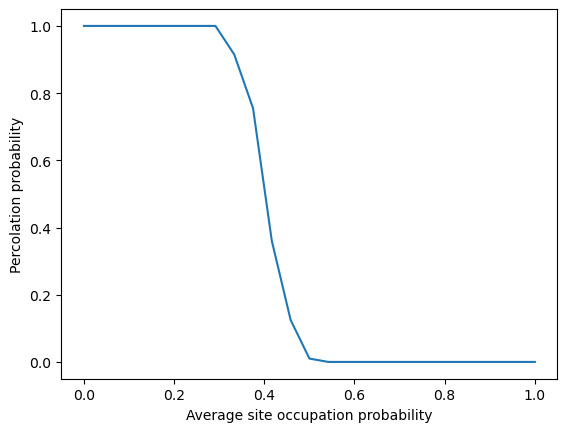

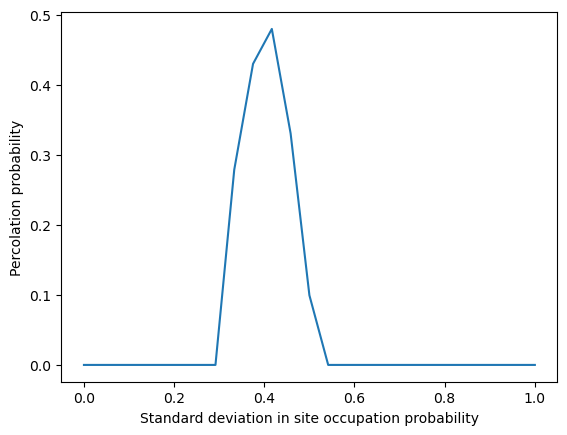

In [55]:
# perform replicate simulations to calculate percolation probability vs site blocking probability
# code copied from William's doc with minor changes of variable naming
pvals = np.linspace(0, 1, 25) # control parameter for percolation phase transition
n_reps = 200 # number of times to repeat the simulation for each p value

all_percolations = list()
for p in pvals:
    print("Running replicate simulations for p = {}".format(p), flush=True)
    all_replicates = list()
    for i in range(n_reps):
        # Initialize the model
        model = Percolation(30, p=p)
        all_replicates.append(model.percolation())
    all_percolations.append(all_replicates)

plt.figure()
plt.plot(pvals, np.mean(np.array(all_percolations), axis=1))
plt.xlabel('Average site occupation probability')
plt.ylabel('Percolation probability')

plt.figure()
plt.plot(pvals, np.std(np.array(all_percolations), axis=1))
plt.xlabel('Standard deviation in site occupation probability')
plt.ylabel('Percolation probability')

plt.show()

The big variation at the phase transition is a signature of critical behavior - the micro state number reaches its maximum

Finished simulation 0
Finished simulation 500
Finished simulation 1000
Finished simulation 1500
Finished simulation 2000
Finished simulation 2500
Finished simulation 3000
Finished simulation 3500
Finished simulation 4000
Finished simulation 4500


(array([  2.,   6.,  21.,  48.,  83., 118., 127., 189., 156., 220., 229.,
        238., 242., 220., 249., 243., 226., 222., 220., 218., 183., 170.,
        153., 139., 157., 140., 126.,  92.,  98.,  69.,  77.,  62.,  43.,
         44.,  28.,  33.,  27.,  21.,  12.,  11.,   9.,   6.,   8.,   3.,
          3.,   2.,   0.,   2.,   2.,   3.]),
 array([ 203.  ,  264.42,  325.84,  387.26,  448.68,  510.1 ,  571.52,
         632.94,  694.36,  755.78,  817.2 ,  878.62,  940.04, 1001.46,
        1062.88, 1124.3 , 1185.72, 1247.14, 1308.56, 1369.98, 1431.4 ,
        1492.82, 1554.24, 1615.66, 1677.08, 1738.5 , 1799.92, 1861.34,
        1922.76, 1984.18, 2045.6 , 2107.02, 2168.44, 2229.86, 2291.28,
        2352.7 , 2414.12, 2475.54, 2536.96, 2598.38, 2659.8 , 2721.22,
        2782.64, 2844.06, 2905.48, 2966.9 , 3028.32, 3089.74, 3151.16,
        3212.58, 3274.  ]),
 <BarContainer object of 50 artists>)

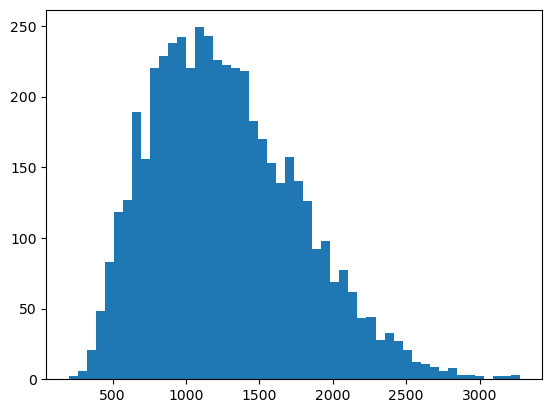

In [57]:
# plot the the distribution of cluster sizes at the percolation threshold
# code copied from William's doc with minor changes
all_cluster_sizes = list()
p_c = 0.407259
n_reps = 5000
for i in range(n_reps):
    model = Percolation(100, p=p_c)
    model.percolation()
    cluster_size = np.sum(model.grid_filled == 2)
    all_cluster_sizes.append(cluster_size)

    if i % 500 == 0:
        print("Finished simulation {}".format(i), flush=True)

all_cluster_sizes = np.array(all_cluster_sizes)

plt.figure()
plt.hist(all_cluster_sizes, 50)